In [1]:
import import_ipynb      #for importing other files in jupyter
import mylibrary_true as ml   #for accessing library
import math
from matplotlib import pyplot as plt  #for plotting
import random

importing Jupyter notebook from mylibrary_true.ipynb


In this project I will try to solve some integrals which are analytically not solvable, using Monte Carlo Importance Sampling method. 

The crux of this method is basically that when we evaluate an integral computationally then the parts of function which contribute more to the integral should be sampled accordingly so that it does not get lost in the randomness of a crude Monte Carlo with a uniform distribution.

In [2]:
class MonteC_Project:     #defining the class
    
    def monte_carlo_uniform(exp, start, end, N, pt = False):        #a unifrom, crude monte carlo, same as that done in class
        
        if isinstance(exp, str):
            func = lambda x: eval(exp) 
        else:
            func = exp


        summ = 0                   #summ is F_n
        sqsumm = 0                 #sqsumm is sigma_n
        h = abs(end - start) / N         #constant factor to be multiplied to summ later

        for i in range(N):         #looping to calculate F_n and sigma_n
            x = random.uniform(start, end)
            summ += func(x)
            sqsumm += func(x)*func(x)
            
        var = (sqsumm/N) - (summ/N)**2      #calculating sigma_n
        summ = h*summ                                     #multiplying constant factor to summ

        if pt == True:                   #plotting the convergence of roots
            plt.plot(plot_n, F)
            plt.title("Convergence of the integral with N")
            plt.xlabel("N")
            plt.ylabel("Value of integral")
            plt.show()

        return summ, var
    
    def mc_impsamp(func, p, start, end, N):              #an improved monte carlo with a sampling function p
    
        summ = 0
        sqsumm = 0

        for i in range(N):                         #dividing the function by p, we continue the loop
            x = random.uniform(start, end)
            summ += func(x)/p(x)
            sqsumm += (func(x)**2)/(p(x)**2)

        summ = summ/N
        var = sqsumm/N - (summ)**2

        return summ, var                           #returning the sum and variance
     
    def mc_impsamp_modified(func, G_inv, p, start, end, N):   #an even more improved monte carlo in which we use G_inv which will be defined later
    
        summ = 0
        sqsumm = 0

        for i in range(N):                         #x is sampled and then the randomness of x is made to be biased according to G_inv(x)
            x = G_inv(random.uniform(0, 1))
            summ += func(x)/p(x)
            sqsumm += (func(x)**2)/(p(x)**2)

        summ = summ/N
        var = sqsumm/N - (summ)**2

        return summ, var                           #returning the sum and variance
    
    def get_int_variance(func, p, start, end, N = 5000):
    
        summ = 0
        sqsumm = 0

        for i in range(N):
            x = random.uniform(start, end)
            summ += func(x)/p(x)
            sqsumm += (func(x)*func(x))/(p(x)*p(x))

        summ = summ/N
        sqsumm = sqsumm/N - (summ)**2

        return sqsumm

Let us first take a function 

$$ f_1(x) = \frac{e^{-x}}{1 + (x - 1)^2} $$

and let us integrate it from a = 0 and b = 10

Using crude monte carlo the integral is =  0.6879941195337637
And the variance is =  0.02137953581073568


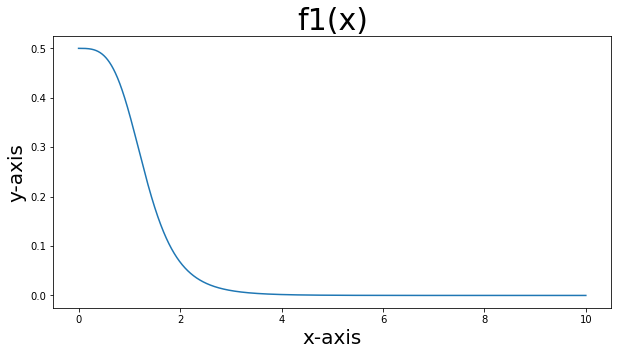

In [3]:
def func1(x):    #defining the function
    f = math.exp(-1*x)/(1 + (x-1)**2)
    return f
a = 0
b = 10 
N = 5000 #say


#using crude monte carlo
summ, sqsumm = MonteC_Project.monte_carlo_uniform(func1, a, b, N)
print("Using crude monte carlo the integral is = ", summ)
print("And the variance is = ", sqsumm)
    
X = []
Y = []
h = abs(b-a)/N
k = a

for i in range(N):
    Y.append(func1(k))
    X.append(k)
    k += h
        
plt.figure(figsize=(10, 5))
plt.plot(X, Y)
plt.title("f1(x)", fontsize = 30)
plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.show()

Now we want a sampling function which mimics f1(x). Our guess should be a function which is integrable and normalized. Looking at function we try

$$ p_1(x) = A e^{-\lambda x} $$

Using normalization condition we get $A = \lambda$

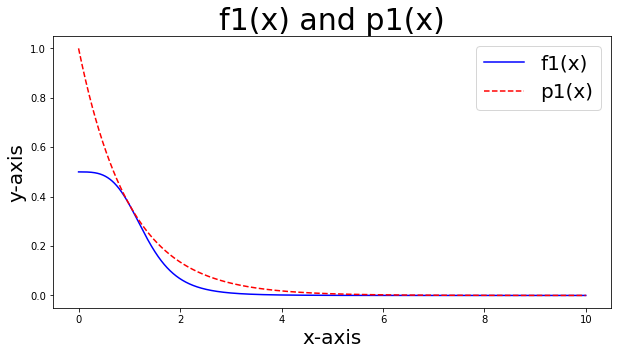

In [4]:
#Lets try to plot f1 and p1 to see if our estimate of p1 is good
#Y1 stores values of f1(x) and Y2 values of p1(x)

X = []
Y1 = []
Y2 = []
h = abs(b-a)/N    #defining step size

def p1(x, s = 1): #defining p1(x)
    p = s*math.exp(-s*x)
    return p

k = a
for i in range(N):       #iterating N times and storing x, f1(x) and p1(x) 
    Y1.append(func1(k))
    Y2.append(p1(k))
    X.append(k)
    k += h
    
#plotting
plt.figure(figsize=(10, 5))
plt.plot(X, Y1, '-b', label = 'f1(x)')
plt.plot(X, Y2, '--r', label = 'p1(x)')
plt.title("f1(x) and p1(x)", fontsize = 30)
plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.legend(loc="upper right", fontsize = 20)
plt.show()
    
plt.show()

Now we will do the importance sampling integration. Note that the value of $\lambda$ was set arbitrarily but we will change it later.

In [5]:
s1, v1 = MonteC_Project.mc_impsamp(func1, p1, a, b, N)
print("Integral = ", s1)
print("Variance = ", v1)

Integral =  0.2240424796061957
Variance =  0.0936160862936262


To choose the right value of $\lambda$ we want to minimize the variance. Also the integral when calculated in wolfram alpha give apprximately 0.699 as the solution. So even if we have sampled, we need to minimize the variance of the integral for that sample function

In [6]:
sg = 1   #initial guess value of lambda
t = 1   #looping parameter
var = MonteC_Project.get_int_variance(func1, p1, a, b)
    
while t < 5:
    t += 0.1
    def p(x, k = 1):
        p = t*math.exp(-t*x)
        return p
    if var > MonteC_Project.get_int_variance(func1, p, a, b):
        var = MonteC_Project.get_int_variance(func1, p, a, b)
        sg = t
        
print("The value of lambda that minimizes the integral variance is ", sg)
        
def p1_best(x, s = round(sg, 2)): #redefining p1(x) with the correct
    p = s*math.exp(-s*x)
    return p


The value of lambda that minimizes the integral variance is  1.5000000000000004


In [7]:
s2, v2 = MonteC_Project.mc_impsamp(func1, p1_best, a, b, N)
print("Integral = ", s2)
print("Variance = ", v2)

Integral =  0.7132749608353218
Variance =  0.05187761204074892


Now we introduce the $G$ function which is $$ G(x) = \int_{0}^{x} g(x) d x $$

We will use the inverse of this to calculate the integral and modify it further. The integral is of G(x) can be calculated as g(x) is taken such that it is integrable. The inverse will be used to bias the random x sample we draw from uniform random function. The details are given in the writeup.

In [8]:
def G_inv1(x, t = sg):
    return (-1*math.log(1-x))/t

In [9]:
s3, v3 = MonteC_Project.mc_impsamp_modified(func1, G_inv1, p1_best, 0, 5, 5000)
print("Integral = ", s3)
print("Variance = ",v3)

Integral =  0.6923902938122124
Variance =  0.07513670727890248


This value is closer to the wolframs calculated value. Lets now see the trend of the integral and its variance calculated for different values of N.

In [10]:
n = 10
S = []   #integral sum
V = []   #variance
N = []   #number of iterations

while n < 10000:
    r, q = MonteC_Project.mc_impsamp_modified(func1, G_inv1, p1_best, 0, 5, n)
    S.append(r)
    V.append(q)
    N.append(n)
    n += 50

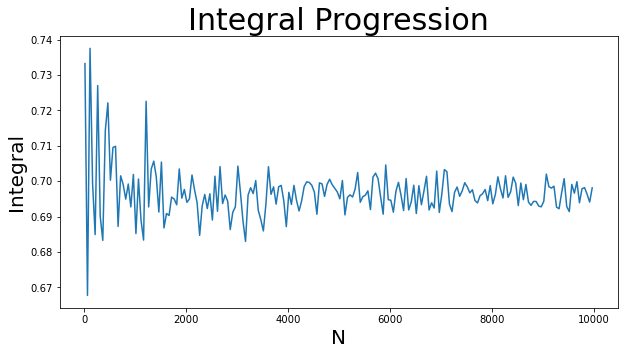

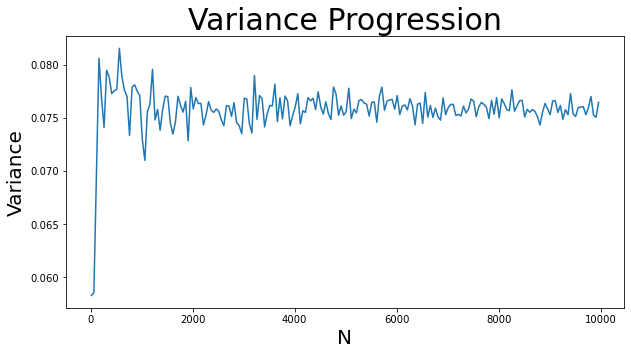

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(N, S)
plt.title("Integral Progression", fontsize = 30)
plt.xlabel('N', fontsize=20)
plt.ylabel('Integral', fontsize=20)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(N, V)
plt.title("Variance Progression", fontsize = 30)
plt.xlabel('N', fontsize=20)
plt.ylabel('Variance', fontsize=20)
plt.show()

In [12]:






#ANOTHER FUNCTION







Lets now try a different function. Lets take 

$$ f_2(x) =  e^{x^2} $$

and integrate it from c = 0 to d = 1

Let us see what happens if we choose a bad distribution function

Using crude monte carlo the integral is =  1.4625453177384622
And the variance is =  0.22275568962098458


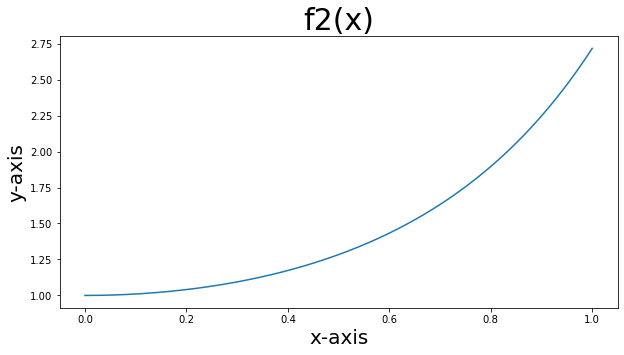

In [13]:
def func2(x):    #defining the function
    f = math.exp(x**2)
    return f
c = 0
d = 1
N = 5000 #say


#using crude monte carlo
summ, sqsumm = MonteC_Project.monte_carlo_uniform(func2, c, d, N)
print("Using crude monte carlo the integral is = ", summ)
print("And the variance is = ", sqsumm)
    
X = []
Y = []
h = abs(d-c)/N
k = c

for i in range(N):
    Y.append(func2(k))
    X.append(k)
    k += h
        
plt.figure(figsize=(10, 5))
plt.plot(X, Y)
plt.title("f2(x)", fontsize = 30)
plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.show()

Trial function is Ae^{sx} and we normalise in for the iterval -infinity to 2. We get A = s/e^{2s}


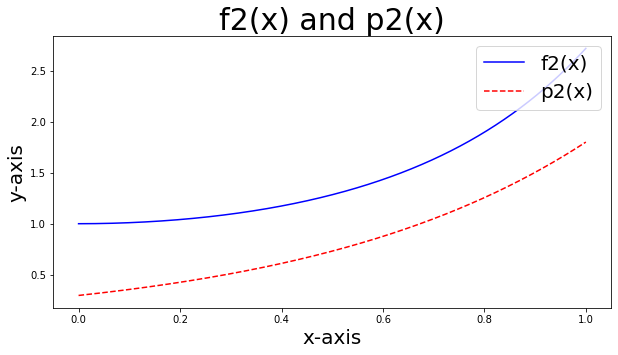

In [14]:
#trial function is Ae^{sx} and we normalise in for the iterval -infinity to 2

def p2(x, k = 1.8):
    return k*math.exp(k*(x-1))

N = 5000
X = []
Y1 = []
Y2 = []
h = abs(d-c)/N    #defining step size

k = c
for i in range(N):       #iterating N times and storing x, f1(x) and p1(x) 
    Y1.append(func2(k))
    Y2.append(p2(k))
    X.append(k)
    k += h
    
#plotting
plt.figure(figsize=(10, 5))
plt.plot(X, Y1, '-b', label = 'f2(x)')
plt.plot(X, Y2, '--r', label = 'p2(x)')
plt.title("f2(x) and p2(x)", fontsize = 30)
plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.legend(loc="upper right", fontsize = 20)
plt.show()
    
plt.show()

We will try to minimise the k parameter in the distribution

In [15]:
s4, v4 = MonteC_Project.mc_impsamp(func2, p2, c, d, N)
print("Integral = ", s4)
print("Variance = ", v4)

Integral =  1.9762898026704308
Variance =  0.27090510257738654


In [16]:
kg = 1   #initial guess value of k
t = 1   #looping parameter
var = MonteC_Project.get_int_variance(func2, p2, c, d)
    
while t < 10:
    t += 0.1
    def p2_temp(x):
        return t*math.exp(t*(x-1))
    if var > MonteC_Project.get_int_variance(func2, p2_temp, c, d):
        var = MonteC_Project.get_int_variance(func2, p2_temp, c, d)
        kg = t
        
print("The value of lambda that minimizes the integral variance is ", kg)

        
def p2_best(x, k = round(kg, 2)): #redefining p1(x) with the correct
    p = k*math.exp(k*(x-1))
    return p


The value of lambda that minimizes the integral variance is  1.1


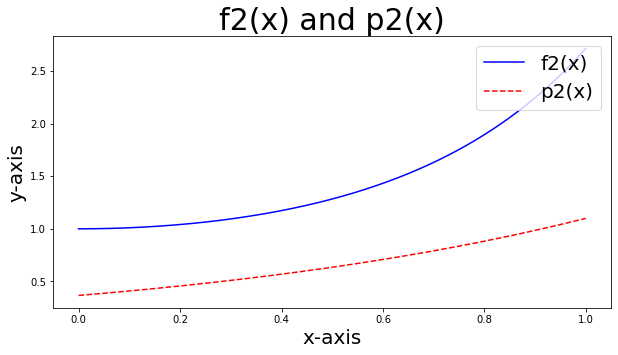

In [17]:
N = 5000
X = []
Y1 = []
Y2 = []
h = abs(d-c)/N    #defining step size

k = c
for i in range(N):       #iterating N times and storing x, f1(x) and p1(x) 
    Y1.append(func2(k))
    Y2.append(p2_best(k))
    X.append(k)
    k += h
    
#plotting
plt.figure(figsize=(10, 5))
plt.plot(X, Y1, '-b', label = 'f2(x)')
plt.plot(X, Y2, '--r', label = 'p2(x)')
plt.title("f2(x) and p2(x)", fontsize = 30)
plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=20)
plt.legend(loc="upper right", fontsize = 20)
plt.show()
    
plt.show()

In [18]:
def G2_inv(x, k = round(kg, 2)):
    return ((math.log(x + math.exp(-k)))/k) + 1

s5, v5 = MonteC_Project.mc_impsamp_modified(func2, G2_inv, p2_best, c, d, N)
print("Integral = ", s5)
print("Variance = ", v5)

Integral =  2.4150461694960277
Variance =  0.14420899932342035


In [19]:
n = 10
S = []   #integral sum
V = []   #variance
N = []   #number of iterations

while n < 10000:
    r, q = MonteC_Project.mc_impsamp_modified(func2, G2_inv, p2_best, c, d, n)
    S.append(r)
    V.append(q)
    N.append(n)
    n += 50

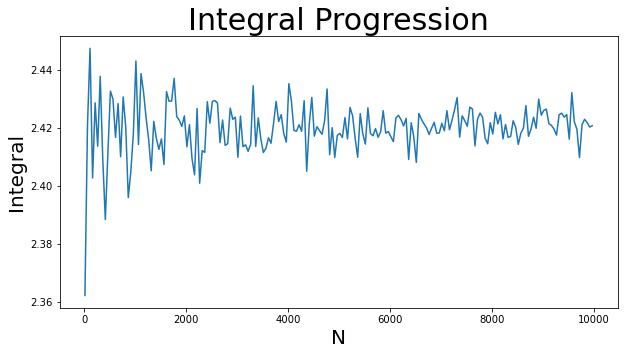

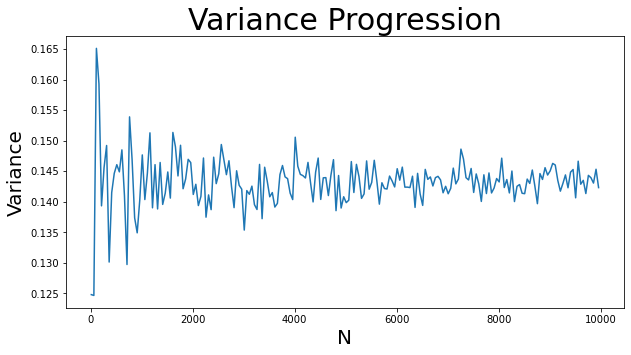

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(N, S)
plt.title("Integral Progression", fontsize = 30)
plt.xlabel('N', fontsize=20)
plt.ylabel('Integral', fontsize=20)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(N, V)
plt.title("Variance Progression", fontsize = 30)
plt.xlabel('N', fontsize=20)
plt.ylabel('Variance', fontsize=20)
plt.show()

Hence we see that even though we chose a sampling function which mimics the function being integrated, we see that p2_best is essentially a straight line in the region concerning us, but func2 is not. This means even with the lowest possible variance p2_best cannot provide as the best sampling function. Other possible useful distribution functions are the cauchy distribution and gaussian distribution to name a few. Wolfram's value of the intergal is about 1.46265, hence the normal distribution does a better job actually. Hence it is an art how to determine the distribution function since in some cases it can be counterintuitive.